In [222]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = '/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/senior_research/data'
CATEGORIES = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
# CATEGORIES = ['Hydrant', 'Palm']

def create_training_data():
    
    data = []

    # for category in CATEGORIES:
    #     path = os.path.join(DATADIR, category)
    #     if category == 'Car' or category == 'Crosswalk':
    #         i = 0
    #         for img in os.listdir(path):
    #             if i == 1000:
    #                 i = 0
    #                 break
    #             converted = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    #             new = cv2.resize(converted, (100, 100))
    #             if category == 'Car':
    #                 data.append([new, 0])
    #             else:
    #                 data.append([new, 1])
    #             i += 1
    #     else:
    #         for img in os.listdir(path):
    #             converted = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    #             new = cv2.resize(converted, (100, 100))
    #             if category == 'Hydrant':
    #                 data.append([new, 2])
    #             else:
    #                 data.append([new, 3])

    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            converted = cv2.imread(os.path.join(path,img))
            new = cv2.resize(converted, (100, 100))
            data.append([new, CATEGORIES.index(category)])

    return data


data = create_training_data()

In [223]:
print(len(data))

5175


In [224]:
import random

random.shuffle(data)

In [225]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, 100, 100, 3)
y = np.array(y)

In [200]:
print(X.shape)
print(y.shape)

(5175, 100, 100, 3)
(5175,)


In [228]:
print(np.unique(y))

[0 1 2 3 4]


In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=32)

In [258]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(2)
# ])

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(layers.Dense(5))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Train on 4916 samples
Epoch 1/20
4916/4916 [==============================] - 40s 8ms/sample - loss: 68.7527 - accuracy: 0.2290
Epoch 2/20
4916/4916 [==============================] - 38s 8ms/sample - loss: 2.3159 - accuracy: 0.2508
Epoch 3/20
4916/4916 [==============================] - 36s 7ms/sample - loss: 1.9989 - accuracy: 0.3301
Epoch 4/20
4916/4916 [==============================] - 37s 8ms/sample - loss: 1.9850 - accuracy: 0.3985
Epoch 5/20
4916/4916 [==============================] - 38s 8ms/sample - loss: 1.9853 - accuracy: 0.4711
Epoch 6/20
4916/4916 [==============================] - 38s 8ms/sample - loss: 1.9377 - accuracy: 0.5242
Epoch 7/20
4916/4916 [==============================] - 36s 7ms/sample - loss: 1.8598 - accuracy: 0.5704
Epoch 8/20
4916/4916 [==============================] - 37s 8ms/sample - loss: 1.7413 - accuracy: 0.5980
Epoch 9/20
4916/4916 [==============================] - 36s 7ms/sample - loss: 1.7633 - accuracy: 0.6328
Epoch 10/20
4916/4916 [=========

In [259]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

259/1 - 1s - loss: 1.0505 - accuracy: 0.8108

Test accuracy: 0.8108108


In [260]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)
predictions[0]

array([0.34082586, 0.03332498, 0.01235795, 0.21603233, 0.39745888],
      dtype=float32)

In [261]:
y_test[0]

3

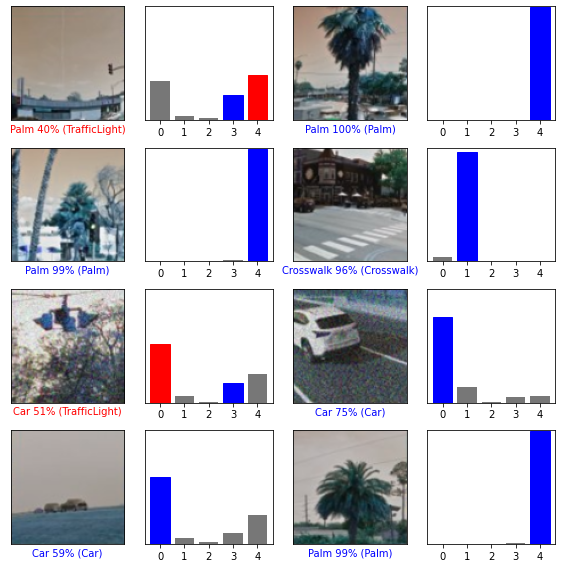

In [262]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


num_rows = 4
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [263]:
_predictions = []
for i in range(len(predictions)):
    _predictions.append([np.argmax(predictions[i]), y_test[i]])

In [264]:
print(_predictions)
print(len(_predictions))

[[4, 3], [4, 4], [4, 4], [1, 1], [0, 3], [0, 0], [0, 0], [4, 4], [2, 2], [4, 0], [0, 0], [4, 4], [3, 4], [1, 1], [1, 1], [0, 3], [2, 2], [4, 4], [4, 3], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 4], [1, 1], [4, 0], [2, 2], [4, 2], [4, 4], [1, 1], [1, 1], [2, 2], [1, 0], [0, 0], [0, 0], [4, 4], [0, 0], [1, 1], [0, 0], [2, 2], [2, 2], [4, 3], [4, 4], [1, 1], [2, 2], [0, 0], [4, 4], [0, 0], [1, 1], [1, 0], [4, 4], [1, 1], [4, 4], [1, 1], [0, 3], [1, 1], [4, 4], [3, 3], [4, 3], [2, 2], [1, 1], [1, 1], [4, 4], [3, 0], [0, 0], [3, 3], [4, 4], [2, 2], [4, 4], [1, 1], [4, 3], [4, 3], [1, 1], [2, 2], [2, 2], [0, 0], [1, 1], [4, 0], [0, 1], [2, 2], [2, 2], [4, 4], [4, 4], [2, 1], [1, 1], [1, 1], [2, 2], [1, 1], [0, 1], [4, 4], [3, 3], [4, 4], [4, 4], [3, 3], [4, 4], [0, 0], [4, 4], [1, 1], [0, 0], [0, 0], [1, 1], [3, 3], [0, 0], [1, 1], [1, 0], [0, 4], [4, 1], [3, 1], [1, 1], [1, 1], [0, 4], [1, 0], [2, 2], [2, 2], [1, 1], [1, 1], [2, 2], [2, 2], [4, 1], [3, 3], [1, 1], [1, 1], [2, 2],

In [280]:
false_predictions = [] # 0 is case when predicted palm but true value is hydrant, 1 is when predicted hydrant but true value is palm
correct_predictions = []
_y_test = y_test.tolist()

for prediction in _predictions:
    if prediction[0] != prediction[1]:
        print('prediction: ', CATEGORIES[prediction[0]], '\n\ttrue value: ', CATEGORIES[prediction[1]])
        if prediction[0] == 0:
            false_predictions.append(0)
        elif prediction[0] == 1:
            false_predictions.append(1)
        elif prediction[0] == 2:
            false_predictions.append(2)
        elif prediction[0] == 3:
            false_predictions.append(3)
        elif prediction[0] == 4:
            false_predictions.append(4)


for prediction in _predictions:
    if prediction[0] == prediction[1]:
        if prediction[0] == 0:
            correct_predictions.append(0)
        elif prediction[0] == 1:
            correct_predictions.append(1)
        elif prediction[0] == 2:
            correct_predictions.append(2)
        elif prediction[0] == 3:
            correct_predictions.append(3)
        elif prediction[0] == 4:
            correct_predictions.append(4)

prediction:  Palm 
	true value:  TrafficLight
prediction:  Car 
	true value:  TrafficLight
prediction:  Palm 
	true value:  Car
prediction:  TrafficLight 
	true value:  Palm
prediction:  Car 
	true value:  TrafficLight
prediction:  Palm 
	true value:  TrafficLight
prediction:  Car 
	true value:  Palm
prediction:  Palm 
	true value:  Car
prediction:  Palm 
	true value:  Hydrant
prediction:  Crosswalk 
	true value:  Car
prediction:  Palm 
	true value:  TrafficLight
prediction:  Crosswalk 
	true value:  Car
prediction:  Car 
	true value:  TrafficLight
prediction:  Palm 
	true value:  TrafficLight
prediction:  TrafficLight 
	true value:  Car
prediction:  Palm 
	true value:  TrafficLight
prediction:  Palm 
	true value:  TrafficLight
prediction:  Palm 
	true value:  Car
prediction:  Car 
	true value:  Crosswalk
prediction:  Hydrant 
	true value:  Crosswalk
prediction:  Car 
	true value:  Crosswalk
prediction:  Crosswalk 
	true value:  Car
prediction:  Car 
	true value:  Palm
prediction:  Pal

<class 'list'>


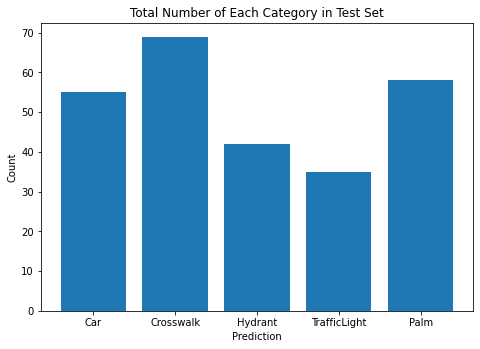

In [282]:
print(type(_y_test))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
count = [_y_test.count(0), _y_test.count(1), _y_test.count(2), _y_test.count(3), _y_test.count(4)]
ax.bar(pred, count)
plt.title('Total Number of Each Category in Test Set')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

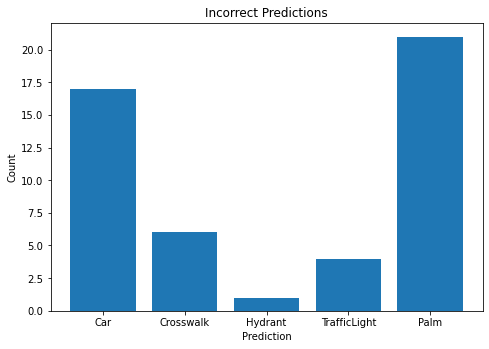

In [266]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
count = [false_predictions.count(0), false_predictions.count(1), false_predictions.count(2), false_predictions.count(3), false_predictions.count(4)]
ax.bar(pred, count)
plt.title('Incorrect Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

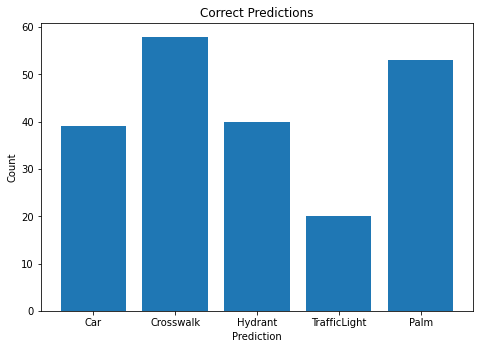

In [267]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
count = [correct_predictions.count(0), correct_predictions.count(1), correct_predictions.count(2), correct_predictions.count(3), correct_predictions.count(4)]
ax.bar(pred, count)
plt.title('Correct Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

Car Prediction Accuracy:  69.64285714285714
Crosswalk Prediction Accuracy:  90.625
Hydrant Prediction Accuracy:  97.5609756097561
TrafficLight Prediction Accuracy:  83.33333333333333
Palm Prediction Accuracy:  71.62162162162163


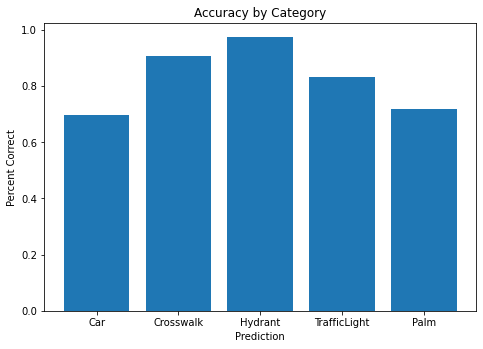

In [291]:
print('Car Prediction Accuracy: ', 100*correct_predictions.count(0)/(correct_predictions.count(0)+false_predictions.count(0)))
print('Crosswalk Prediction Accuracy: ', 100*correct_predictions.count(1)/(correct_predictions.count(1)+false_predictions.count(1)))
print('Hydrant Prediction Accuracy: ', 100*correct_predictions.count(2)/(correct_predictions.count(2)+false_predictions.count(2)))
print('TrafficLight Prediction Accuracy: ', 100*correct_predictions.count(3)/(correct_predictions.count(3)+false_predictions.count(3)))
print('Palm Prediction Accuracy: ', 100*correct_predictions.count(4)/(correct_predictions.count(4)+false_predictions.count(4)))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']

pct = [
    correct_predictions.count(0)/(correct_predictions.count(0)+false_predictions.count(0)), 
    correct_predictions.count(1)/(correct_predictions.count(1)+false_predictions.count(1)), 
    correct_predictions.count(2)/(correct_predictions.count(2)+false_predictions.count(2)), 
    correct_predictions.count(3)/(correct_predictions.count(3)+false_predictions.count(3)), 
    correct_predictions.count(4)/(correct_predictions.count(4)+false_predictions.count(4))
]

ax.bar(pred, pct)
plt.title('Accuracy by Category')
plt.xlabel('Prediction')
plt.ylabel('Percent Correct')
plt.show()